# Melakukan import data

In [1]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Melakukan import csv ke dalam panda dataframe 

In [2]:
cell_df = pd.read_csv("cell_samples.csv")

Menampilkan 5 data pertama dalam dataframe

In [3]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


variabel 'ax' berisi diagram dari dataframe cell_df.
data yang diambil adalah data class yang bernilai '4' sejumlah '50' data. 
dengan desain plotting diagram scatter, nilai x berupa nilai 'Clump' dan nilai y berupa nilai 'UnifSize' dengan warna scatter 'DarkBlue' berlabel 'malignant'

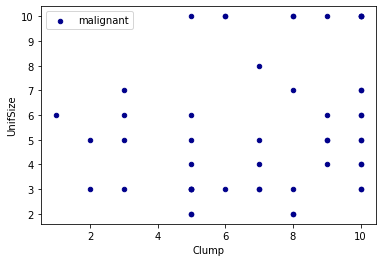

In [29]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

objek yang digenerate dalam diagram

In [5]:
ax

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

variabel 'ay' berisi diagram dari dataframe cell_df.
data yang diambil adalah data class yang bernilai '2' sejumlah '50' data. 
dengan desain plotting diagram scatter, nilai x berupa nilai 'Clump' dan nilai y berupa nilai 'UnifSize' dengan warna scatter 'Yellow' berlabel 'benign' dengan nilai ax = ax

In [32]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

objek yang digenerate dalam diagram

In [7]:
ay

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

variabel 'ay' berisi diagram dari dataframe cell_df.
data yang diambil adalah data class yang bernilai '2' sejumlah '50' data. 
dengan desain plotting diagram scatter, nilai x berupa nilai 'Clump' dan nilai y berupa nilai 'UnifSize' dengan warna scatter 'Yellow' berlabel 'benign'

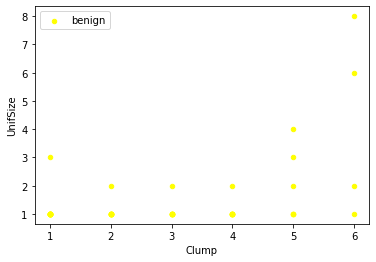

In [8]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign');

Mengembalikan tipe data tiap column

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

mengubah tipe data column 'BareNuc' menjadi numeric type dengan invalid parsing bernilai 'NaN'

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

feature_df berisi data dari cell_df yang berupa 9 column.
x merupakan variabel yang mewadahi nilai array dari feature_df.
dan x mencari 5 data dari atas

In [11]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

mengembalikan nilai column class menjadi tipe data int sebanyak 5 data dari atas

In [12]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

Membentuk bagian training dan testing algoritma dengan membagi ukuran test_size = 0.2 dari keseluruhan data dan sisanya dikembalikan ke nilai train set

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


mengimport library svm
clf mewadahi svc dengan model kernel rbf

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')


Menyesuaikan model clf berdasarkan data x_train dan y_train

In [15]:
clf.fit(X_train, y_train) 


SVC()

yhat mewadahi nilai dari prediksi dari nilai X_test

In [16]:
yhat = clf.predict(X_test)

mengambil nilai yhat berdasarkan 5 data teratas

In [17]:
yhat[0:5]

array([2, 4, 2, 4, 2])

desain diagram dari confusion matrix

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

mengimport library confusion_matrix dan classification_report

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cnf_matrix mewadahi nilai dari komputasi confusion matrix dari nilai y_test, yhat dengan label 2 dan 4

In [20]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])

memberikan opsi print dengan precision=2 digit tipe data float

In [21]:
np.set_printoptions(precision=2)

memberikan hasil classification_report dari nilai y_test dan yhat

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



membuat figure object

In [23]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

menampilkoan confusion matrix dengan parameter nilai cnf_matrix dst

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


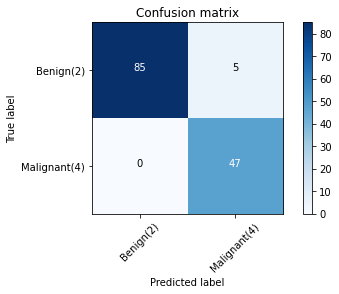

In [39]:
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

mengimport library f1_score.
menampilkan hasil komputasi f1_score dengan formulasi "F1 = 2 * (precision * recall) / (precision + recall)"
berdasarkan parameter target values = y_test, estimated target = yhat dan average = weighted

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

mengimport library jaccard_score
menghitung jaccard_score

In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=2)

0.9444444444444444